In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

node = "All"  # Adjust as needed
unblankedfile = "/datax/scratch/vlopez/summary_data/ALL_1336-9064_beam0000_unblanked"
filestem = "/datax/scratch/vlopez/summary_data/ALL_1336-9064_beam0000_2"
filtered_bliss = "/datax/scratch/vlopez/summary_data/ALL_1336-9064_beam0000_final"

print("**********************************")
print("Beginning quick node plotter for:", node + "/" + filestem + "/" + unblankedfile + "/" + filtered_bliss) 
print("**********************************")

# Read your unblanked bliss results file
unblanked_bliss_results = pd.read_csv(
    unblankedfile + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

bliss_results = pd.read_csv(
    filestem + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

final_bliss_results = pd.read_csv(
    filtered_bliss + ".dat",
    skiprows=9,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

final_results = bliss_results[(bliss_results['Drift_Rate'] >= 0) & (bliss_results['Drift_Rate'] <= 1.5)]




**********************************
Beginning quick node plotter for: All//datax/scratch/vlopez/summary_data/ALL_1336-9064_beam0000_2//datax/scratch/vlopez/summary_data/ALL_1336-9064_beam0000_unblanked//datax/scratch/vlopez/summary_data/ALL_1336-9064_beam0000_final
**********************************


/tmp/ipykernel_2336692/1975555094.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  unblanked_bliss_results = pd.read_csv(
/tmp/ipykernel_2336692/1975555094.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bliss_results = pd.read_csv(
/tmp/ipykernel_2336692/1975555094.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  final_bliss_results = pd.read_csv(


In [2]:
print("unblanked drift rate hits", len(unblanked_bliss_results['Drift_Rate']))
print("Blanking drift rate hits", len(bliss_results['Drift_Rate']))
print("Drift rate hits", len(final_bliss_results['Drift_Rate']))

unblanked drift rate hits 37015820
Blanking drift rate hits 5203794
Drift rate hits 605929


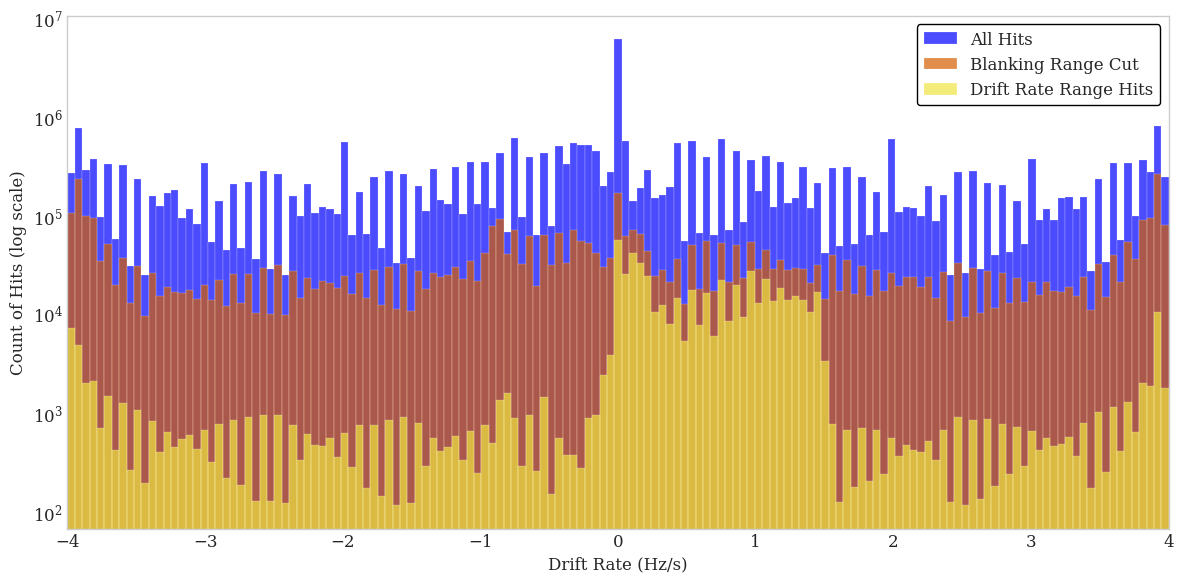

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 12
})

bin = np.linspace(-4, 4, 150)

plt.figure(figsize=(12, 6))

plt.hist(unblanked_bliss_results['Drift_Rate'], bins=bin, log=True,
         color='blue', alpha=0.7, label='All Hits', edgecolor='white', linewidth=0.2)

plt.hist(bliss_results['Drift_Rate'], bins=bin, log=True,
         color='#D55E00', alpha=0.7, label='Blanking Range Cut', edgecolor='white', linewidth=0.2)

plt.hist(final_bliss_results['Drift_Rate'], bins=bin, log=True,
         color='#F0E442', alpha=0.7, label='Drift Rate Range Hits', edgecolor='white', linewidth=0.2)



plt.xlim(-4, 4)
plt.xlabel('Drift Rate (Hz/s)')
plt.ylabel('Count of Hits (log scale)')

plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.grid(False)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2336692/2205654189.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=-5)


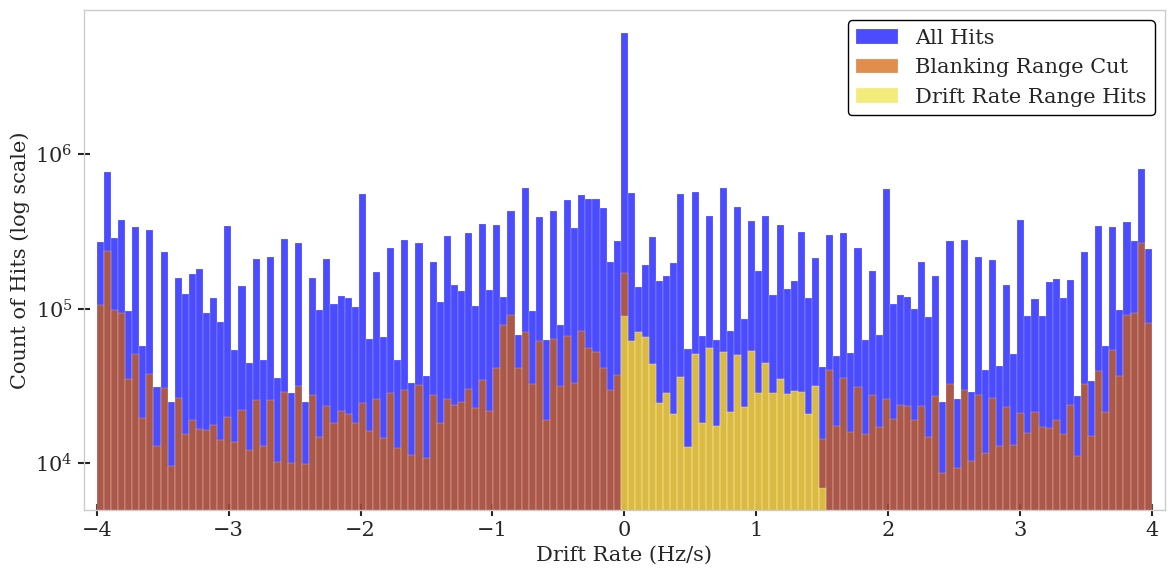

In [20]:
# Histogram of the Drift Rate

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 15,
    "axes.labelsize": 15,
    "axes.titlesize": 15,
    "legend.fontsize": 15
})

bin = np.linspace(-4, 4, 150)

plt.figure(figsize=(12, 6))

plt.hist(unblanked_bliss_results['Drift_Rate'], bins=bin, log=True,
         color='blue', alpha=0.7, label='All Hits', edgecolor='white', linewidth=0.2)

plt.hist(bliss_results['Drift_Rate'], bins=bin, log=True,
         color='#D55E00', alpha=0.7, label='Blanking Range Cut', edgecolor='white', linewidth=0.2)

plt.hist(final_results['Drift_Rate'], bins=bin, log=True,
         color='#F0E442', alpha=0.7, label='Drift Rate Range Hits', edgecolor='white', linewidth=0.2)



plt.xlim(-4.1, 4.1)
plt.ylim(bottom=-5)
plt.xlabel('Drift Rate (Hz/s)')
plt.ylabel('Count of Hits (log scale)')
plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.tick_params(axis='both', which='both', direction='inout', width=1.5, length=9)
plt.tick_params(axis='y', which='minor',length=0)
plt.grid(False)
plt.tight_layout()
plt.show()


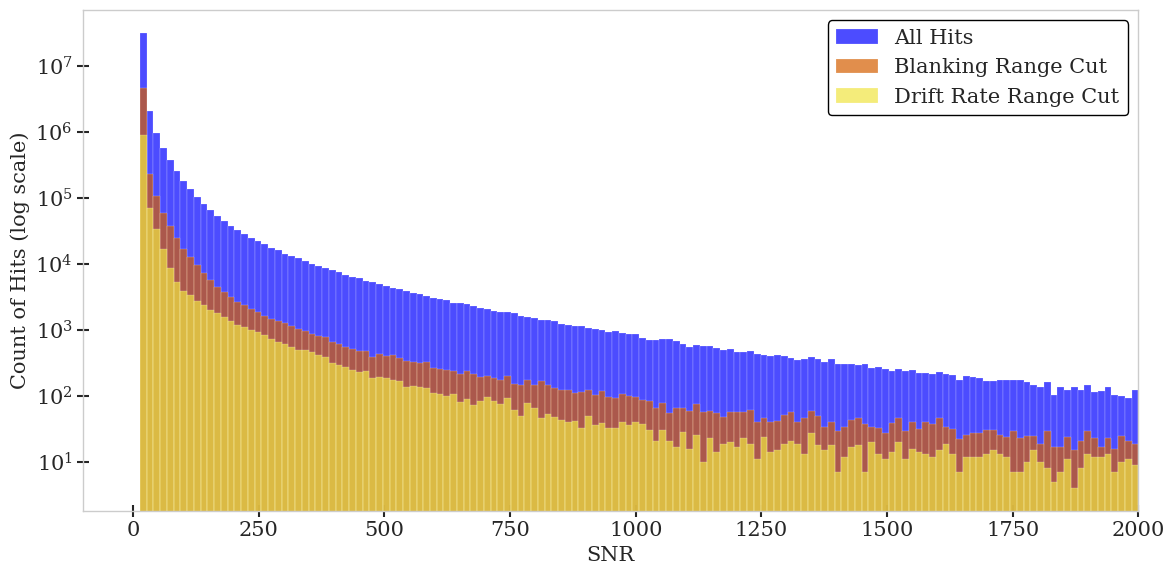

In [8]:
# Histogram of the SNR
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 15,
    "axes.labelsize": 15,
    "axes.titlesize": 15,
    "legend.fontsize": 15
})

bin = np.linspace(0, 2000, 150)

plt.figure(figsize=(12, 6))
plt.hist(unblanked_bliss_results['SNR'], log=True, bins=bin, color='blue', alpha=0.7, label='All Hits', edgecolor='white', linewidth=0.2)
plt.hist(bliss_results['SNR'], log=True, bins=bin, color='#D55E00', alpha=0.7, label='Blanking Range Cut', edgecolor='white', linewidth=0.2)
plt.hist(final_results['SNR'], log=True, bins=bin, color='#F0E442', alpha=0.7, label='Drift Rate Range Cut', edgecolor='white', linewidth=0.2)
plt.xlim(right=2000)
plt.xlabel('SNR')  
plt.ylabel('Count of Hits (log scale)')                     
#plt.title('Signal-to-Noise Ratio (SNR) from 1-9 MHz')

plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.tick_params(axis='both', which='both', direction='inout', width=1.5, length=8)
plt.tick_params(axis='y', which='minor',length=0)
plt.grid(False)
plt.tight_layout()
plt.show()